In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


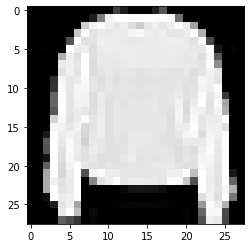

In [4]:
plt.imshow(X_train[7], cmap='gray')

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


## Visualisation

In [0]:
w_grid = 5
l_grid = 5

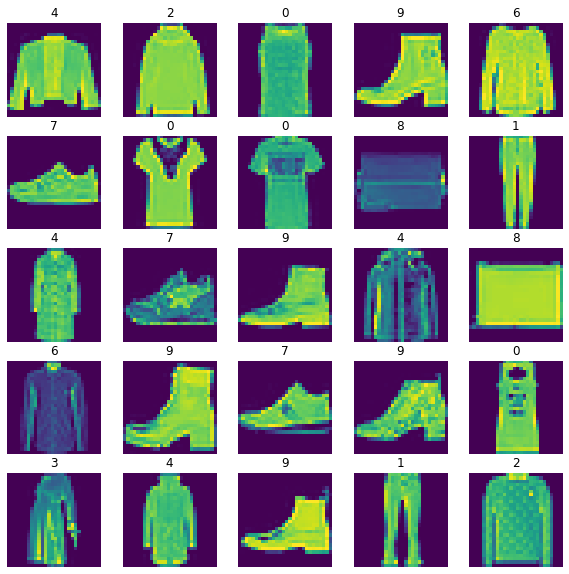

In [7]:
fig, axes = plt.subplots(l_grid, w_grid, figsize=(10,10))
axes = axes.ravel()
n_training = len(X_train)

for i in range(0, l_grid*w_grid):
    index = random.randint(0,60000)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

## Adding Noise in image

In [0]:
# Rescaling the image
X_train = X_train/255.
X_test = X_test/255.

In [0]:
# making Nosiy data
noise_factor = 0.3
noise_dataset = []

for img in X_train:
    noise_image = img + noise_factor * np.random.randn(*img.shape)
    noise_image = np.clip(noise_image,0,1)
    noise_dataset.append(noise_image)
noise_dataset = np.array(noise_dataset)

In [0]:
# making Nosiy data
noise_factor = 0.2
noise_test_dataset = []

for img in X_test:
    noise_image = img + noise_factor * np.random.randn(*img.shape)
    noise_image = np.clip(noise_image,0,1)
    noise_test_dataset.append(noise_image)
noise_test_dataset = np.array(noise_test_dataset)

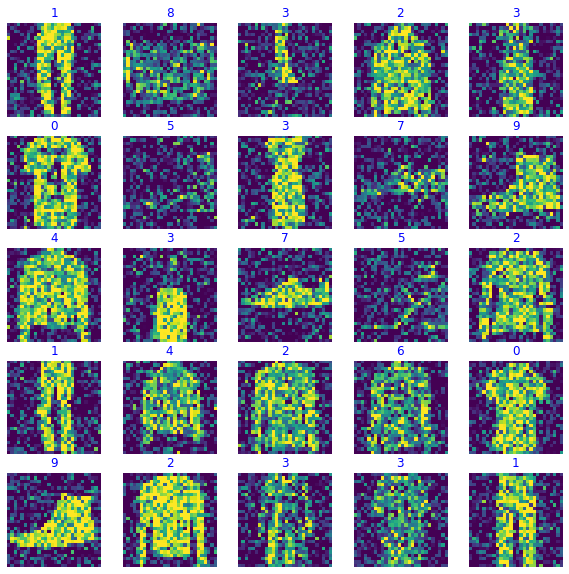

In [11]:
fig, axes = plt.subplots(l_grid, w_grid, figsize=(10,10))
axes = axes.ravel()
n_training = len(X_train)

for i in range(0, l_grid*w_grid):
    index = random.randint(0,60000)
    axes[i].imshow(noise_dataset[index])
    axes[i].set_title(y_train[index],fontsize = 12, color='b')
    axes[i].axis('off')

## Building model

In [0]:
autoencoder = tf.keras.models.Sequential()

autoencoder.add(tf.keras.layers.Conv2D(16, 3,strides=2, padding='same', input_shape=(28, 28, 1)))
autoencoder.add(tf.keras.layers.Conv2D(8, 3,strides=2, padding='same'))
autoencoder.add(tf.keras.layers.Conv2D(8, 3,strides=1, padding='same'))

autoencoder.add(tf.keras.layers.Conv2DTranspose(16, 3,strides=2, padding='same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(1, 3,strides=2,activation='sigmoid', padding='same'))


In [13]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy')
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = autoencoder.fit(noise_dataset.reshape(-1,28,28,1),
                X_train.reshape(-1,28,28,1),
                epochs=20,
                batch_size=100,
                validation_data = (noise_test_dataset.reshape(-1,28,28,1), X_test.reshape(-1,28,28,1)))

Epoch 1/20
600/600 [==============================] - 20s 34ms/step - loss: 0.3591 - val_loss: 0.3097
Epoch 2/20
600/600 [==============================] - 20s 34ms/step - loss: 0.3096 - val_loss: 0.3010
Epoch 3/20
600/600 [==============================] - 20s 34ms/step - loss: 0.3048 - val_loss: 0.2982
Epoch 4/20
600/600 [==============================] - 20s 34ms/step - loss: 0.3028 - val_loss: 0.2963
Epoch 5/20
600/600 [==============================] - 20s 34ms/step - loss: 0.3017 - val_loss: 0.2952
Epoch 6/20
600/600 [==============================] - 20s 34ms/step - loss: 0.3009 - val_loss: 0.2936
Epoch 7/20
600/600 [==============================] - 20s 34ms/step - loss: 0.3004 - val_loss: 0.2929
Epoch 8/20
600/600 [==============================] - 20s 34ms/step - loss: 0.3001 - val_loss: 0.2948
Epoch 9/20
600/600 [==============================] - 20s 34ms/step - loss: 0.2998 - val_loss: 0.2928
Epoch 10/20
600/600 [==============================] - 20s 34ms/step - loss: 0.299

In [24]:
score = autoencoder.evaluate(noise_test_dataset.reshape(-1,28,28,1), X_test.reshape(-1,28,28,1))
print('test score = ', score)

313/313 [==============================] - 2s 5ms/step - loss: 0.2919
test score =  0.29187437891960144


In [0]:
predicted = autoencoder.predict(noise_dataset[:10].reshape(-1,28,28,1))

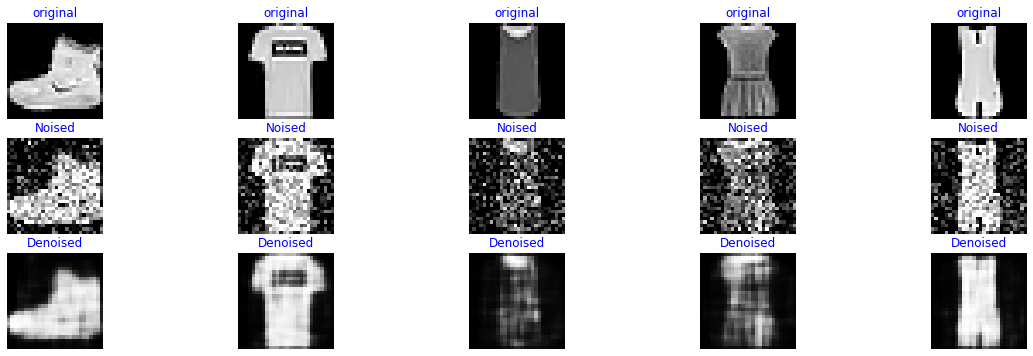

In [53]:
fig, axes = plt.subplots(3, 5, figsize=(20,6))
axes = axes.ravel()
for i in range(5):
    axes[i].imshow(X_train[i].reshape(28,28),cmap='gray')
    axes[i].set_title('original',fontsize = 12, color='b')
    axes[i].axis('off')
for i in range(5,10):
    axes[i].imshow(noise_dataset[i-5].reshape(28,28),cmap='gray')
    axes[i].set_title('Noised',fontsize = 12, color='b')
    axes[i].axis('off')
for i in range(10,15):
    axes[i].imshow(predicted[i-10].reshape(28,28),cmap='gray')
    axes[i].set_title('Denoised',fontsize = 12, color='b')
    axes[i].axis('off')